In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## import dataset

In [44]:
dataset = pd.read_csv('employee.csv')
dataset = dataset.iloc[:, 1:126]

# tX = dataset.iloc[:, 2:124]
# tY = dataset.iloc[:, 125]
# X = dataset.iloc[:, 2:123].values #idや名前は除去(特徴量ではない)
# y = dataset.iloc[:, 125].values #output(0 or 1) 

In [45]:
dataset.head()

,GAME,COUNTRY,YEAR,NAPFLT,GOBFLT,SERAMY,NWYAMY,GASAMY,AEGFLT,TUNAMY,...,MARFLT,ROMFLT,EDIAMY,EDIFLT,LONAMY,NAPAMY,NAOFLT,MUNAMY,LONFLT,OUTPUT
0,1.0,RUS,1901,[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],4.0
1,1.0,AUS,1901,[],[],AUS,[],[],[],[],...,[],[],[],[],[],[],[],[],[],4.0
2,1.0,GER,1901,[],[],AUS,[],[],[],[],...,[],[],[],[],[],[],[],[],[],4.0
3,1.0,TUR,1901,[],[],AUS,[],[],[],[],...,[],[],[],[],[],[],[],[],[],4.0
4,1.0,FRA,1901,[],[],AUS,[],[],[],[],...,[],[],[],[],[],[],[],FRA,[],6.0


国別に分けて, outputのデータを最終年の補給地の数にする

In [46]:
rus_dataset = dataset[dataset.COUNTRY == 'RUS']
aus_dataset = dataset[dataset.COUNTRY == 'AUS']
ger_dataset = dataset[dataset.COUNTRY == 'GER']
tur_dataset = dataset[dataset.COUNTRY == 'TUR']
fra_dataset = dataset[dataset.COUNTRY == 'FRA']
eng_dataset = dataset[dataset.COUNTRY == 'ENG']
ita_dataset = dataset[dataset.COUNTRY == 'ITA']

In [47]:
eng_dataset.head()

,GAME,COUNTRY,YEAR,NAPFLT,GOBFLT,SERAMY,NWYAMY,GASAMY,AEGFLT,TUNAMY,...,MARFLT,ROMFLT,EDIAMY,EDIFLT,LONAMY,NAPAMY,NAOFLT,MUNAMY,LONFLT,OUTPUT
5,1.0,ENG,1901,[],[],AUS,[],[],[],[],...,[],[],[],[],[],[],[],FRA,[],3.0
12,1.0,ENG,1902,[],RUS,AUS,[],[],TUR,[],...,[],[],[],[],[],[],[],FRA,[],4.0
19,1.0,ENG,1903,[],RUS,AUS,[],[],TUR,[],...,[],[],[],[],[],[],[],FRA,[],4.0
26,1.0,ENG,1904,[],RUS,AUS,[],FRA,TUR,[],...,[],[],[],[],ENG,[],[],FRA,[],3.0
33,1.0,ENG,1905,FRA,RUS,AUS,[],FRA,TUR,[],...,[],[],[],[],ENG,[],[],FRA,[],3.0


In [48]:
from sklearn.utils import shuffle

In [94]:
tX = eng_dataset.iloc[:, 0:124]
tX = shuffle(tX)
tX = tX.drop_duplicates('GAME')
tX = tX.sort_values('GAME').iloc[:, 3:124]
tY = eng_dataset.drop_duplicates('GAME', keep = 'last').iloc[:,124]

In [95]:
tX.head()

,NAPFLT,GOBFLT,SERAMY,NWYAMY,GASAMY,AEGFLT,TUNAMY,NWYFLT,GASFLT,YORAMY,...,GALAMY,MARFLT,ROMFLT,EDIAMY,EDIFLT,LONAMY,NAPAMY,NAOFLT,MUNAMY,LONFLT
12,[],RUS,AUS,[],[],TUR,[],[],[],[],...,[],[],[],[],[],[],[],[],FRA,[]
124,ITA,RUS,AUS,RUS,FRA,AUS,[],RUS,[],ENG,...,RUS,[],[],[],ENG,ENG,[],ENG,GER,ENG
187,ITA,RUS,AUS,RUS,FRA,TUR,[],ENG,[],ENG,...,AUS,[],ITA,ENG,ENG,ENG,ITA,ENG,FRA,FRA
243,ITA,RUS,AUS,RUS,RUS,TUR,[],ENG,[],ENG,...,RUS,ITA,ITA,ENG,ENG,ENG,ITA,ENG,GER,ENG
439,ITA,RUS,RUS,RUS,FRA,TUR,[],ENG,ITA,ENG,...,RUS,ITA,ITA,ENG,ENG,ENG,ITA,FRA,FRA,ENG


In [96]:
tY.head()

47      3.0
152     4.0
229     5.0
341    10.0
460     4.0
Name: OUTPUT, dtype: float64

In [97]:
print(tX.shape,tY.shape)

(1589, 121) (1589,)


In [98]:
X = tX.values
y = tY.values

## Encoding categorical data
データの成形を行う

In [99]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

##labelをエンコードする
le = LabelEncoder()
le.fit(['RUS','AUS','GER','TUR','FRA','ENG', 'ITA', '[]'])

for i in range(121):
    X[:, i] = le.transform(X[:, i])

### Gender
# labelencoder_X_2 = LabelEncoder()
# X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2]) 

In [100]:
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()

##  データセットと学習セットに分ける

In [103]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
t
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# モデルの作成

In [104]:
from sklearn import svm
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

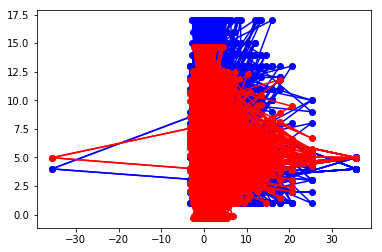

0.283460905175


In [105]:
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
# reg = GridSearchCV(svm.SVR(), tuned_parameters, cv=5, scoring='mean_squared_error')
# reg = GridSearchCV(svm.SVR(), tuned_parameters, cv=5, scoring='mean_squared_error')
# reg.fit(X_train, y_train)

# サポートベクトル回帰を学習データ使って作成
reg = svm.SVR(kernel='rbf', C=10).fit(X_train, y_train)

# テストデータに対する予測結果のPLOT
plt.plot(X_test, y_test, 'bo-', X_test, reg.predict(X_test), 'ro-')
plt.show()

print(reg.score(X_test, y_test))

In [106]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predict = reg.predict(X_test)
print(sqrt(mean_squared_error(y_test, predict)))

3.669331903643073


In [107]:
from sklearn.externals import joblib
# 予測モデルを出力
joblib.dump(reg, 'svm.learn')

['svm.learn']